# Creating a spectral plot

One exercise we can do to practice is to create a spectral plot.  Doing this involves opening each band of a raster and pulling out a specific pixel's value.  If the raster is small enough we wouldn't have to do this for a single point it would be easy enough to load the whole raster into memory.  If your raster is more than a few gigbytes, however this may not be an option.

I'll go through three methods of extracting your slice, starting with the simplest (smallest amount of data) and getting more complex (necessary as your data gets bigger).
1. Loading the whole raster into memory
2. Reading each band and extracting your value
3. Using `rasterio` Windows

In [1]:
# All notebook imports
import rasterio
import matplotlib.pyplot as plt 
import numpy as np
from rasterio.windows import Window

## #1 Loading the whole raster into memory

If you can open your whole raster at once the method for getting the array for your spectral plot in a single line.

**Read all the data**

In [2]:
import rasterio

In [3]:
filepath_rad = '../input_data/f100520t01p00r08rdn_b/f100520t01p00r08rdn_b_sc01_ort_img'

In [4]:
with rasterio.open(filepath_rad, 'r') as src:
    indexes = src.indexes
    full_raster = src.read()

**Pull out your value**

In [5]:
# Specify the row and column of the pixel whose values you want to plot
row, col = (1000, 50)

In [6]:
my_slice = full_raster[:, row, col]

In [7]:
my_slice

array([1301, 1513, 1572, 1969, 2778, 2876, 2726, 2608, 2905, 3015, 2987,
       2882, 2800, 2650, 2557, 2447, 2303, 2283, 2261, 2211, 2125, 2035,
       1986, 1827, 1803, 1817, 1755, 1681, 1675, 1590, 1549, 1604, 1535,
       1602, 1574, 1404, 1287, 1304, 1184,  919, 1058, 1237, 1226,  770,
       1117, 1170, 1081, 1030,  910,  717,  784,  906,  950,  940,  931,
        916,  855,  620,  504,  454,  389,  153,  119,  191,  397,  481,
        641,  692,  673,  677,  664,  651,  640,  614,  591,  558,  508,
        456,  330,  186,   35,   28,   52,   49,  129,  248,  292,  286,
        311,  312,  336,  368,  400,  403,  383,  324,  382,  330,  332,
        348,  333,  272,  206,   84,   82,   45,    6,    3,    4,    5,
         20,    3,    9,    7,    7,    9,   29,   35,   35,   58,  156,
        272,  357,  417,  459,  486,  501,  479,  430,  431,  445,  413,
        417,  437,  432,  398,  397,  388,  381,  377,  357,  340,  321,
        298,  270,  243,  231,  198,  142,   88,   

That was it.  We have our slice.  All that is left to do is graph it.

**Graph the data**

In [8]:
import matplotlib.pyplot as plt 

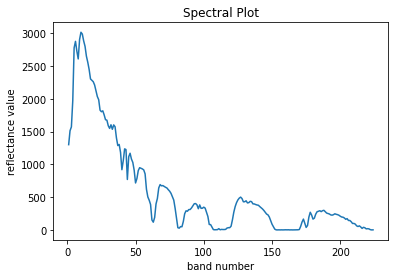

In [9]:
plt.plot(indexes, my_slice)
plt.xlabel('band number') 
# naming the y axis 
plt.ylabel('reflectance value') 
  
# giving a title to my graph 
plt.title('Spectral Plot') 

# function to show the plot 
plt.show()

## #2 Reading each band and extracting your value

In this technique we are going to loop through each band of the raster one by one and save out our value.  It is useful for arrays that are too slow when loaded fully into memory but it can be a slow process for arrays that are above a certain size.

**Set up your input data**

In [10]:
filepath_rad = '../input_data/f100520t01p00r08rdn_b/f100520t01p00r08rdn_b_sc01_ort_img'

In [11]:
# Specify the row and column of the pixel whose values you want to plot
row, col = (1000, 50)

**Read each band and pull out your value**

In [12]:
import numpy as np

In [13]:
%%time
with rasterio.open(filepath_rad, 'r') as src:
    my_slice = np.full(src.count, np.nan)
    for i in src.indexes:
        # Read the layer from the Dataset Reader object
        new_value = src.read(i)[row, col]
        # Because the indexes are start from 1 but the elements of an array start from 0 we need to adjust 
        # by setting the new_value to the position i-1 
        my_slice[i-1] = new_value
        print('added a new value to the array ', new_value)

added a new value to the array  1301
added a new value to the array  1513
added a new value to the array  1572
added a new value to the array  1969
added a new value to the array  2778
added a new value to the array  2876
added a new value to the array  2726
added a new value to the array  2608
added a new value to the array  2905
added a new value to the array  3015
added a new value to the array  2987
added a new value to the array  2882
added a new value to the array  2800
added a new value to the array  2650
added a new value to the array  2557
added a new value to the array  2447
added a new value to the array  2303
added a new value to the array  2283
added a new value to the array  2261
added a new value to the array  2211
added a new value to the array  2125
added a new value to the array  2035
added a new value to the array  1986
added a new value to the array  1827
added a new value to the array  1803
added a new value to the array  1817
added a new value to the array  1755
a

**Graph it**

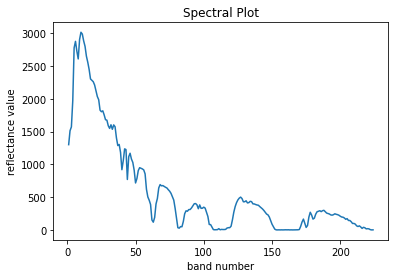

In [14]:
plt.plot(indexes, my_slice)
plt.xlabel('band number') 
# naming the y axis 
plt.ylabel('reflectance value') 
  
# giving a title to my graph 
plt.title('Spectral Plot') 

# function to show the plot 
plt.show()

## #3 Using `rasterio` Windows

In this technique we are going to loop through each band of the raster very similarly to the last technique.  The difference is that instead of reading out the whole dataset we are going to use a rasterio object called a Window to access our data.  For a more in-depth explanation of Window objects see the "Subsetting Data" notebook.

This technique should work well with the largest data files.

**Set up your input data**

In [15]:
filepath_rad = '../input_data/f100520t01p00r08rdn_b/f100520t01p00r08rdn_b_sc01_ort_img'

In [16]:
# Specify the row and column of the pixel whose values you want to plot
row, col = (1000, 50)

**Read each band and pull out your value**

In [17]:
import numpy as np
from rasterio.windows import Window

A reminder about the syntax of the Window object:

> Window(COLUMN_OFFSET, ROW_OFFSET, WIDTH, HEIGHT)

The OFFSETs specify the row and column numbers of the upper left corner of your window.

So getting the 1000-1800th row and 200-420th column with a window object would look like `Window(200, 1000, 220, 800)`.

In [18]:
%%time
with rasterio.open(filepath_rad, 'r') as src:
    # We want our window to start at our target pixel and be 1 pixel in size
    my_window = Window(col, row, 1, 1)
    my_slice = src.read(window=my_window)
    print(window_array.shape)

NameError: name 'window_array' is not defined

In [19]:
my_slice

array([[[1301]],

       [[1513]],

       [[1572]],

       [[1969]],

       [[2778]],

       [[2876]],

       [[2726]],

       [[2608]],

       [[2905]],

       [[3015]],

       [[2987]],

       [[2882]],

       [[2800]],

       [[2650]],

       [[2557]],

       [[2447]],

       [[2303]],

       [[2283]],

       [[2261]],

       [[2211]],

       [[2125]],

       [[2035]],

       [[1986]],

       [[1827]],

       [[1803]],

       [[1817]],

       [[1755]],

       [[1681]],

       [[1675]],

       [[1590]],

       [[1549]],

       [[1604]],

       [[1535]],

       [[1602]],

       [[1574]],

       [[1404]],

       [[1287]],

       [[1304]],

       [[1184]],

       [[ 919]],

       [[1058]],

       [[1237]],

       [[1226]],

       [[ 770]],

       [[1117]],

       [[1170]],

       [[1081]],

       [[1030]],

       [[ 910]],

       [[ 717]],

       [[ 784]],

       [[ 906]],

       [[ 950]],

       [[ 940]],

       [[ 931]],

       [[ 

Looking at the output we see that instead of an array of data values we have an array of arrays of arrays of data values.  The way to describe this is that we have "too many dimensions". To get to the first value we want to be able to run `my_slice[0]`, not `my_slice[0][0][0]`.  To fix this we use the `np.squeeze()` function.

In [20]:
my_slice = np.squeeze(my_slice)
print(my_slice)

[1301 1513 1572 1969 2778 2876 2726 2608 2905 3015 2987 2882 2800 2650
 2557 2447 2303 2283 2261 2211 2125 2035 1986 1827 1803 1817 1755 1681
 1675 1590 1549 1604 1535 1602 1574 1404 1287 1304 1184  919 1058 1237
 1226  770 1117 1170 1081 1030  910  717  784  906  950  940  931  916
  855  620  504  454  389  153  119  191  397  481  641  692  673  677
  664  651  640  614  591  558  508  456  330  186   35   28   52   49
  129  248  292  286  311  312  336  368  400  403  383  324  382  330
  332  348  333  272  206   84   82   45    6    3    4    5   20    3
    9    7    7    9   29   35   35   58  156  272  357  417  459  486
  501  479  430  431  445  413  417  437  432  398  397  388  381  377
  357  340  321  298  270  243  231  198  142   88   49   13    2    1
    2    1    2    1    2    3    2    3    1    2    1    2    2    2
    3    7   56  122  166  105   39   68  196  270  228  166  180  241
  278  285  294  280  294  300  278  258  251  244  230  226  233  247
  239 

**Graph it**

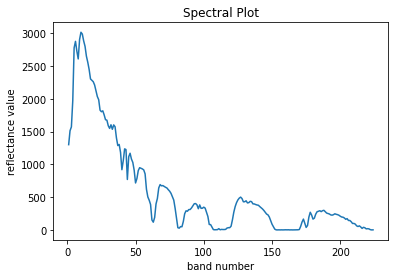

In [21]:
plt.plot(indexes, my_slice)
plt.xlabel('band number') 
# naming the y axis 
plt.ylabel('reflectance value') 
  
# giving a title to my graph 
plt.title('Spectral Plot') 

# function to show the plot 
plt.show()

## A comment about the plots

I used band number in this plot because it was easy, but you might be more interested in plotting the actual wavelenght.  If you have of wavelengths you could just as easily use those values on the x-axis.

In [22]:
import numpy as np

In [23]:
my_fake_wavelengths = np.linspace(start=400, stop=2450, num=224)

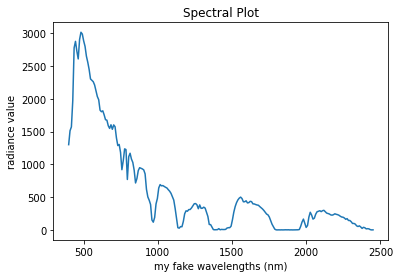

In [24]:
plt.plot(my_fake_wavelengths, my_slice)
plt.xlabel('my fake wavelengths (nm)') 
# naming the y axis 
plt.ylabel('radiance value') 
  
# giving a title to my graph 
plt.title('Spectral Plot') 

# function to show the plot 
plt.show()